# Does Ensemble really work well against single models on a real dataset?

* In this tutorial, we are going to check whether getting ensemble, especially Bagging, with various types of single models work well compared to each single model.  

* Models are for the binary classification.  

* Single Models: Logistic Regression, KNN, Decision Tree, SVM

* Ensemble : Getting hard or soft voting with the results of each single model

* Moreover, we will get the result of Random Forest as well

In [1]:
import sklearn
import pandas as pd
import numpy as np

# Data: Wine quality

* Data is about classifying the quality of wine into good or bad

* You can get the data from [here](https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification).

In [112]:
from sklearn.model_selection import train_test_split
random_state = 42
data = pd.read_csv('wine.csv')
train, test = train_test_split(data,test_size=0.1,random_state=random_state,shuffle=True,stratify=data['quality'])
x_train, y_train = train.iloc[:,:-1],train.iloc[:,-1]
x_test, y_test = test.iloc[:,:-1],test.iloc[:,-1]

[Text(0, 0, '86'), Text(0, 0, '74')]

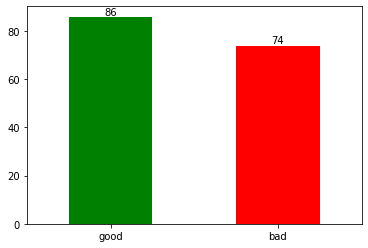

In [113]:
import matplotlib.pyplot as plt
bars=y_test.value_counts().plot(kind='bar', rot=0, color=['g','r'])
plt.bar_label(bars.containers[0])


# Fitting each single models

* To get the best result, parameter tuning by GridSearchCV will be done for each model

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [114]:
best_params,clf_reports,predictions,probs={},{},{},{}

In [115]:
# Logistic Regression

parameters=dict(
    penalty = ['elasticnet'],
    max_iter=[1000],
    C=[0.1,0.25,0.5,0.75],
    solver = ['saga'],
    n_jobs=[-1],
    l1_ratio=[0,0.25,0.5,0.75,1.0]
)

logReg = LogisticRegression()
clf = GridSearchCV(
    logReg,
    parameters
).fit(x_train,y_train)
best_params['logReg']=clf.best_params_
y_predict = clf.predict(x_test)
predictions['logReg']=y_predict
y_prob = clf.predict_proba(x_test)
probs['logReg'] = y_prob
clf_reports['logReg']=classification_report(y_test,y_predict)
print(clf_reports['logReg'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

              precision    recall  f1-score   support

         bad       0.78      0.61      0.68        74
        good       0.72      0.85      0.78        86

    accuracy                           0.74       160
   macro avg       0.75      0.73      0.73       160
weighted avg       0.74      0.74      0.73       160



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [116]:
# KNN
parameters = dict(
    n_neighbors=[3,5,7,9],
    weights=['uniform','distance'],
    p=[1,2],
)
knn = KNeighborsClassifier()

clf = GridSearchCV(
    knn,
    parameters
).fit(x_train,y_train)
best_params['knn'] = clf.best_params_
y_predict = clf.predict(x_test)
predictions['knn']=y_predict
y_prob = clf.predict_proba(x_test)
probs['knn'] = y_prob
clf_reports['knn']=classification_report(y_test,y_predict)
print(clf_reports['knn'])

              precision    recall  f1-score   support

         bad       0.78      0.73      0.76        74
        good       0.78      0.83      0.80        86

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.78      0.78      0.78       160



In [117]:
# Decision Tree

parameters=dict(
    criterion=['gini','entropy','log_loss'],
    max_features=['sqrt','log2'],
    random_state=[1,2,3],

)
dt = DecisionTreeClassifier()
clf = GridSearchCV(
    dt,
    parameters
).fit(x_train,y_train)
best_params['dt'] = clf.best_params_
y_predict = clf.predict(x_test)
predictions['dt']=y_predict
y_prob = clf.predict_proba(x_test)
probs['dt'] = y_prob
clf_reports['dt']=classification_report(y_test,y_predict)
print(clf_reports['dt'])

              precision    recall  f1-score   support

         bad       0.80      0.77      0.79        74
        good       0.81      0.84      0.82        86

    accuracy                           0.81       160
   macro avg       0.81      0.80      0.80       160
weighted avg       0.81      0.81      0.81       160



In [118]:
# SVM
parameters = dict(
    C=[0.1,0.5,0.8,1.0],
    kernel=['linear','poly','rbf'],
    probability=[True],
    coef0=[0,0.3,0.5]
)
svm = SVC()
clf = GridSearchCV(
    svm,
    parameters
).fit(x_train,y_train)
best_params['svm'] = clf.best_params_
y_predict = clf.predict(x_test)
predictions['svm']=y_predict
y_prob = clf.predict_proba(x_test)
probs['svm'] = y_prob
clf_reports['svm']=classification_report(y_test,y_predict)
print(clf_reports['svm'])

              precision    recall  f1-score   support

         bad       0.73      0.73      0.73        74
        good       0.77      0.77      0.77        86

    accuracy                           0.75       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.75      0.75      0.75       160



In [119]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score

scores = {}
for model in ['logReg','knn','dt','svm']:
    scores[model]={
        'acc':accuracy_score(y_test,predictions[model]),
        'f1':f1_score(y_test,predictions[model],average='macro'),
        'roc_auc':roc_auc_score(y_test,probs[model][:,1])
    }
scores = pd.DataFrame(scores).transpose()
scores

,acc,f1,roc_auc
logReg,0.73750,0.729207,0.810182
knn,0.78125,0.778752,0.862665
dt,0.80625,0.804532,0.803740
svm,0.75000,0.748586,0.815839


* As the results, Decision Tree got the best results on the accuracy and f1 scores, however, its roc_auc score was the lowest.

* It seems that KNN works pretty well as a single model

# Ensemble: Voting

* Now, we are going to get the result of voting from each single model with the best parameters found by GridSearch.

* There are two options: Hard voting, Soft voting  
    Since Hard voting gets the results with predicted labels, it is hard to get roc_auc scores

In [120]:
from sklearn.ensemble import VotingClassifier

ensemble_results={}
ens_hard = VotingClassifier(
    estimators=[('logReg',LogisticRegression(**best_params['logReg'])),
                ('knn',KNeighborsClassifier(**best_params['knn'])),
                ('dt',DecisionTreeClassifier(**best_params['dt'])),
                ('svm',SVC(**best_params['svm']))
    ],
    voting = 'hard'
).fit(x_train,y_train)


ensemble_results['ens_hard']={
        'acc':accuracy_score(y_test,ens_hard.predict(x_test)),
        'f1':f1_score(y_test,ens_hard.predict(x_test),average='macro'),
        #'roc_auc':roc_auc_score(y_test,ens_diff_hard.predict_proba(x_test))
    }
ensemble_results['ens_hard']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'acc': 0.8125, 'f1': 0.8120300751879699}

In [121]:
ens_soft = VotingClassifier(
    estimators=[('logReg',LogisticRegression(**best_params['logReg'])),
                ('knn',KNeighborsClassifier(**best_params['knn'])),
                ('dt',DecisionTreeClassifier(**best_params['dt'])),
                ('svm',SVC(**best_params['svm']))
    ],
    voting = 'soft'
).fit(x_train,y_train)


ensemble_results['ens_soft']={
        'acc':accuracy_score(y_test,ens_soft.predict(x_test)),
        'f1':f1_score(y_test,ens_soft.predict(x_test),average='macro'),
        'roc_auc':roc_auc_score(y_test,ens_soft.predict_proba(x_test)[:,1])
    }
ensemble_results['ens_soft']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'acc': 0.8375, 'f1': 0.8349206349206348, 'roc_auc': 0.899277184160905}

# Final score

* Here is the final scores of single models and hard/soft voting of each single model

In [122]:
final_scores = scores.append(pd.DataFrame(ensemble_results).transpose())
final_scores

,acc,f1,roc_auc
logReg,0.73750,0.729207,0.810182
knn,0.78125,0.778752,0.862665
dt,0.80625,0.804532,0.803740
svm,0.75000,0.748586,0.815839
ens_hard,0.81250,0.812030,NaN
ens_soft,0.83750,0.834921,0.899277


* It is really interesting that Ensemble really works well!  

* Both types of voting(Hard,Soft) are better than any other single models in terms of Accuracy and F1 scores.  

* Especially, Soft voting made the best results of all the metrics.

* When it comes to Ensemble, it takes two important things: Diversity, Accuracy  
    - Each baselearner should be different to each other.  
    - Of course, they should do well.  

* Since the ensemble we did above satifies these two conidtions, it made the best results.  

* Then, what if we do the voting with the one type of model with different parameters?  
    In this case, we are going to check with Decision Tree.

In [123]:
dt_params=dict(
    dt1={'criterion':'gini','splitter':'best','max_features':'sqrt','random_state':1,},
    dt2={'criterion':'gini','splitter':'random','max_features':'sqrt','random_state':2,},
    dt3={'criterion':'entropy','splitter':'best','max_features':'log2','random_state':3,},
    dt4={'criterion':'entropy','splitter':'random','max_features':'sqrt','random_state':4,},
)

ens_dt_hard = VotingClassifier(
    estimators=[('dt1',DecisionTreeClassifier(**dt_params['dt1'])),
                ('dt2',DecisionTreeClassifier(**dt_params['dt2'])),
                ('dt3',DecisionTreeClassifier(**dt_params['dt3'])),
                ('dt4',DecisionTreeClassifier(**dt_params['dt4'])),
    ],
    voting = 'hard'
).fit(x_train,y_train)


ensemble_results['ens_dt_hard']={
        'acc':accuracy_score(y_test,ens_dt_hard.predict(x_test)),
        'f1':f1_score(y_test,ens_dt_hard.predict(x_test),average='macro'),
        #'roc_auc':roc_auc_score(y_test,ens_soft.predict_proba(x_test)[:,1])
    }
ensemble_results['ens_dt_hard']

{'acc': 0.7875, 'f1': 0.786967418546366}

In [124]:
dt_params=dict(
    dt1={'criterion':'gini','splitter':'best','max_features':'sqrt','random_state':1,},
    dt2={'criterion':'gini','splitter':'random','max_features':'sqrt','random_state':2,},
    dt3={'criterion':'entropy','splitter':'best','max_features':'log2','random_state':3,},
    dt4={'criterion':'entropy','splitter':'random','max_features':'sqrt','random_state':4,},
)

ens_dt_soft = VotingClassifier(
    estimators=[('dt1',DecisionTreeClassifier(**dt_params['dt1'])),
                ('dt2',DecisionTreeClassifier(**dt_params['dt2'])),
                ('dt3',DecisionTreeClassifier(**dt_params['dt3'])),
                ('dt4',DecisionTreeClassifier(**dt_params['dt4'])),
    ],
    voting = 'soft'
).fit(x_train,y_train)


ensemble_results['ens_dt_soft']={
        'acc':accuracy_score(y_test,ens_dt_soft.predict(x_test)),
        'f1':f1_score(y_test,ens_dt_soft.predict(x_test),average='macro'),
        'roc_auc':roc_auc_score(y_test,ens_dt_soft.predict_proba(x_test)[:,1])
    }
ensemble_results['ens_dt_soft']

{'acc': 0.7875, 'f1': 0.786967418546366, 'roc_auc': 0.8819924575738529}

In [125]:
final_scores = scores.append(pd.DataFrame(ensemble_results).transpose())
final_scores

,acc,f1,roc_auc
logReg,0.73750,0.729207,0.810182
knn,0.78125,0.778752,0.862665
dt,0.80625,0.804532,0.803740
svm,0.75000,0.748586,0.815839
ens_hard,0.81250,0.812030,NaN
ens_soft,0.83750,0.834921,0.899277
ens_dt_hard,0.78750,0.786967,NaN
ens_dt_soft,0.78750,0.786967,0.881992


* As we can see, making ensemble with only one type of model is not that good, which means diversity does matter for the ensemble.

* Then, what about doing Bagging instead of just simple voting with one type of model?

In [127]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(**best_params['dt']),
    n_estimators = 4,
    random_state = 1
    ).fit(x_train,y_train)

ensemble_results['bagging_dt']={
        'acc':accuracy_score(y_test,bagging_clf.predict(x_test)),
        'f1':f1_score(y_test,bagging_clf.predict(x_test),average='macro'),
        'roc_auc':roc_auc_score(y_test,bagging_clf.predict_proba(x_test)[:,1])
    }

scores.append(pd.DataFrame(ensemble_results).transpose())

,acc,f1,roc_auc
logReg,0.73750,0.729207,0.810182
knn,0.78125,0.778752,0.862665
dt,0.80625,0.804532,0.803740
svm,0.75000,0.748586,0.815839
ens_hard,0.81250,0.812030,NaN
ens_soft,0.83750,0.834921,0.899277
ens_dt_hard,0.78750,0.786967,NaN
ens_dt_soft,0.78750,0.786967,0.881992
bagging_dt,0.78750,0.787201,0.868636


* Bagging in this case did not work well compared to the votings.

* As as a result, soft voting can be a better option

# Data: Breast cancer diagnosis

* Let's do the whole process again with another dataset which is breast cancer dataset

In [102]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
x_train,x_test,y_train,y_test = train_test_split(data['data'],data['target'],test_size=0.2, random_state=random_state,stratify=data['target'])

# Fitting each single models

* To get the best result, parameter tuning by GridSearchCV will be done for each model

In [103]:
best_params,clf_reports,predictions,probs={},{},{},{}

In [104]:
# Logistic Regression

parameters=dict(
    penalty = ['elasticnet'],
    max_iter=[1000],
    C=[0.1,0.25,0.5,0.75],
    solver = ['saga'],
    n_jobs=[-1],
    l1_ratio=[0,0.25,0.5,0.75,1.0]
)

logReg = LogisticRegression()
clf = GridSearchCV(
    logReg,
    parameters
).fit(x_train,y_train)
best_params['logReg']=clf.best_params_
y_predict = clf.predict(x_test)
predictions['logReg']=y_predict
y_prob = clf.predict_proba(x_test)
probs['logReg'] = y_prob
clf_reports['logReg']=classification_report(y_test,y_predict)
print(clf_reports['logReg'])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.93      0.97      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [105]:
# KNN
parameters = dict(
    n_neighbors=[3,5,7,9],
    weights=['uniform','distance'],
    p=[1,2],
)
knn = KNeighborsClassifier()

clf = GridSearchCV(
    knn,
    parameters
).fit(x_train,y_train)
best_params['knn'] = clf.best_params_
y_predict = clf.predict(x_test)
predictions['knn']=y_predict
y_prob = clf.predict_proba(x_test)
probs['knn'] = y_prob
clf_reports['knn']=classification_report(y_test,y_predict)
print(clf_reports['knn'])

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [106]:
# Decision Tree

parameters=dict(
    criterion=['gini','entropy','log_loss'],
    max_features=['sqrt','log2'],
    random_state=[1,2,3],

)
dt = DecisionTreeClassifier()
clf = GridSearchCV(
    dt,
    parameters
).fit(x_train,y_train)
best_params['dt'] = clf.best_params_
y_predict = clf.predict(x_test)
predictions['dt']=y_predict
y_prob = clf.predict_proba(x_test)
probs['dt'] = y_prob
clf_reports['dt']=classification_report(y_test,y_predict)
print(clf_reports['dt'])

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [107]:
# SVM
parameters = dict(
    C=[0.1,0.5,0.8,1.0],
    kernel=['linear','poly','rbf'],
    probability=[True],
    coef0=[0,0.3,0.5]
)
svm = SVC()
clf = GridSearchCV(
    svm,
    parameters
).fit(x_train,y_train)
best_params['svm'] = clf.best_params_
y_predict = clf.predict(x_test)
predictions['svm']=y_predict
y_prob = clf.predict_proba(x_test)
probs['svm'] = y_prob
clf_reports['svm']=classification_report(y_test,y_predict)
print(clf_reports['svm'])

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [108]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score

scores = {}
for model in ['logReg','knn','dt','svm']:
    scores[model]={
        'acc':accuracy_score(y_test,predictions[model]),
        'f1':f1_score(y_test,predictions[model],average='macro'),
        'roc_auc':roc_auc_score(y_test,probs[model][:,1])
    }
scores = pd.DataFrame(scores).transpose()
scores

,acc,f1,roc_auc
logReg,0.938596,0.932981,0.950066
knn,0.929825,0.924603,0.965939
dt,0.912281,0.907468,0.915675
svm,0.956140,0.952129,0.996362


* For this dataset, SVM get the best result with all the metrics.

* Other single models work well as they show at least 0.9 in f1-score.

# Ensemble: Voting

* Now, we are going to get the result of voting from each single model with the best parameters found by GridSearch.

* There are two options: Hard voting, Soft voting  
    Since Hard voting gets the results with predicted labels, it is hard to get roc_auc scores

In [109]:
from sklearn.ensemble import VotingClassifier

ensemble_results={}
ens_hard = VotingClassifier(
    estimators=[('logReg',LogisticRegression(**best_params['logReg'])),
                ('knn',KNeighborsClassifier(**best_params['knn'])),
                ('dt',DecisionTreeClassifier(**best_params['dt'])),
                ('svm',SVC(**best_params['svm']))
    ],
    voting = 'hard'
).fit(x_train,y_train)


ensemble_results['ens_hard']={
        'acc':accuracy_score(y_test,ens_hard.predict(x_test)),
        'f1':f1_score(y_test,ens_hard.predict(x_test),average='macro'),
        #'roc_auc':roc_auc_score(y_test,ens_diff_hard.predict_proba(x_test))
    }
ensemble_results['ens_hard']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'acc': 0.9473684210526315, 'f1': 0.9434523809523809}

In [110]:
ens_soft = VotingClassifier(
    estimators=[('logReg',LogisticRegression(**best_params['logReg'])),
                ('knn',KNeighborsClassifier(**best_params['knn'])),
                ('dt',DecisionTreeClassifier(**best_params['dt'])),
                ('svm',SVC(**best_params['svm']))
    ],
    voting = 'soft'
).fit(x_train,y_train)


ensemble_results['ens_soft']={
        'acc':accuracy_score(y_test,ens_soft.predict(x_test)),
        'f1':f1_score(y_test,ens_soft.predict(x_test),average='macro'),
        'roc_auc':roc_auc_score(y_test,ens_soft.predict_proba(x_test)[:,1])
    }
ensemble_results['ens_soft']

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'acc': 0.9385964912280702,
 'f1': 0.9329805996472663,
 'roc_auc': 0.9900793650793651}

In [111]:
final_scores = scores.append(pd.DataFrame(ensemble_results).transpose())
final_scores

,acc,f1,roc_auc
logReg,0.938596,0.932981,0.950066
knn,0.929825,0.924603,0.965939
dt,0.912281,0.907468,0.915675
svm,0.956140,0.952129,0.996362
ens_hard,0.947368,0.943452,NaN
ens_soft,0.938596,0.932981,0.990079


* For this dataset, soft voting is not better than the best single model SVM.  
    Hard voting made better performances than soft voting on the scores of accuracy and f1.

* However, the results with votings are better than any other single models except SVM.

* Still, it is worth to try votings for finding better results!